In [104]:
from __future__ import print_function, division
import pyomo

import pypsa
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline 

In [87]:
# global vars

num_buses = 20

In [111]:
network = pypsa.Network()

#add buses
for i in range(num_buses):
    network.add("Bus","My bus {}".format(i),
                v_nom=20.)
    
for i in range(num_buses):
    network.add("Line","My line {}".format(i),
                bus0="My bus {}".format(i),
                bus1="My bus {}".format((i+1)%num_buses),
                x=0.1,
                r=0.01)
    
#add a generator at bus 0
network.add("Generator","My gen",
            bus="My bus 0",
            p_set=[100],
            control='PQ')

#add a load at bus 5
network.add("Load", "My load",
            bus="My bus 5",
            p_set=[100])

In [112]:
network.pf()

In [113]:
network.generators_t.p_set

,My gen
now,100.0


In [114]:
network.buses_t.v_ang*180/np.pi

,My bus 0,My bus 1,My bus 2,My bus 3,My bus 4,My bus 5,My bus 6,My bus 7,My bus 8,My bus 9,My bus 10,My bus 11,My bus 12,My bus 13,My bus 14,My bus 15,My bus 16,My bus 17,My bus 18,My bus 19
now,0.0,-1.07816,-2.163587,-3.255568,-4.353364,-5.456208,-5.08808,-4.720456,-4.353364,-3.986833,-3.620891,-3.255568,-2.890891,-2.526888,-2.163587,-1.801014,-1.439196,-1.07816,-0.717931,-0.358536


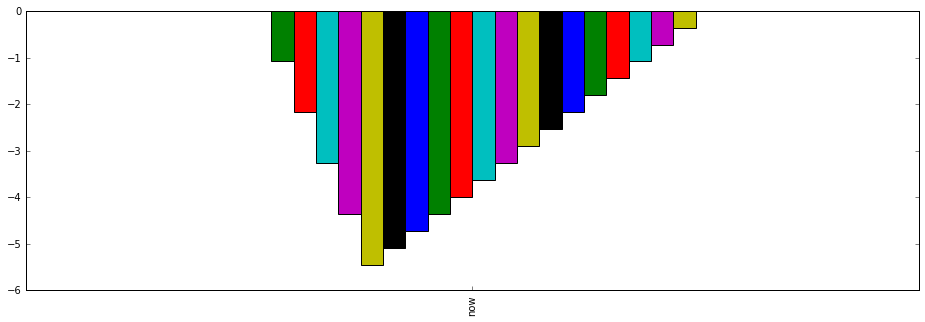

In [128]:
(network.buses_t.v_ang*180/np.pi).plot(kind='bar', legend=None, figsize=(16,5))

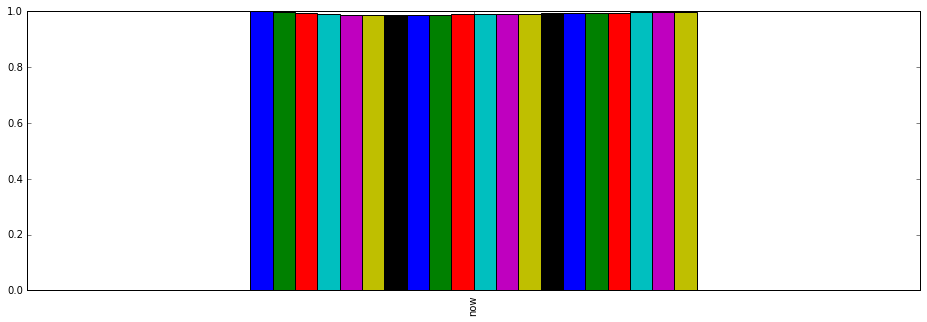

In [130]:
network.buses_t.v_mag_pu.plot(kind='bar', legend=None, figsize=(16,5))

In [115]:
print(network.generators_t.p_set)

     My gen
now   100.0
